In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.0.0


In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

11493376/11490434 [==============================] - 24s 2us/step
(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


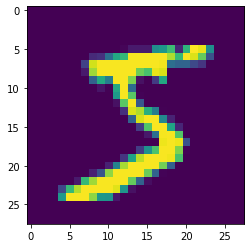

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [16]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
print(x_train[0].shape)
print(x_test[0].shape)

(28, 28, 1)
(28, 28, 1)


In [18]:
model = keras.Sequential()

In [20]:
model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]), \
                       filters=32,kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))

In [21]:
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer=keras.optimizers.Adam(),\
             loss=keras.losses.SparseCategoricalCrossentropy(),\
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(x_train, y_train, batch_size=64, \
                    epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 12s 230us/sample - loss: 0.9153 - accuracy: 0.8476 - val_loss: 0.2467 - val_accuracy: 0.9467
Epoch 2/5
54000/54000 [==============================] - 11s 204us/sample - loss: 0.1845 - accuracy: 0.9528 - val_loss: 0.1502 - val_accuracy: 0.9633
Epoch 3/5
54000/54000 [==============================] - 11s 202us/sample - loss: 0.1144 - accuracy: 0.9693 - val_loss: 0.1140 - val_accuracy: 0.9745
Epoch 4/5
54000/54000 [==============================] - 10s 188us/sample - loss: 0.0812 - accuracy: 0.9766 - val_loss: 0.1175 - val_accuracy: 0.9713
Epoch 5/5
54000/54000 [==============================] - 11s 196us/sample - loss: 0.0653 - accuracy: 0.9809 - val_loss: 0.0921 - val_accuracy: 0.9778


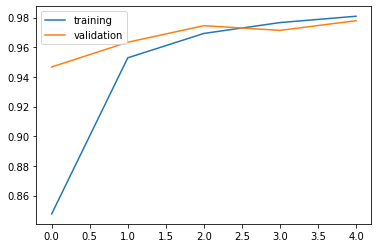

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [32]:
res = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================